In [68]:
# %pip install ruamel.yaml tensorflow

In [8]:
import sys
sys.path.append('cascade/')

In [34]:
import os,  glob
import matplotlib.pyplot as plt
from scipy.ndimage import percentile_filter
import numpy as np
import scipy.io as sio
import ruamel.yaml as yaml
yaml = yaml.YAML(typ='rt')
from cascade.cascade2p import cascade
from cascade.cascade2p.utils import plot_dFF_traces, plot_noise_level_distribution, plot_noise_matched_ground_truth

In [12]:
F = np.load('data/F.npy')
Fneu = np.load('data/Fneu.npy')
spks = np.load('data/spks.npy')

In [37]:
Fcorr = [(F[i] - 0.1*Fneu[i]) for i in range(len(F))]
dF = [(Fcorr[i] - np.median(Fcorr[i])) for i in range(len(Fcorr))]
dff = np.array([dF[i]/np.median(Fcorr[i]) for i in range(len(dF))])

In [57]:
inds = [2, 5, 6, 7, 8, 10, 11]
traces = dff[inds]
deconv = spks[inds]

## Getting CASCADE Code

## Running CASCADE

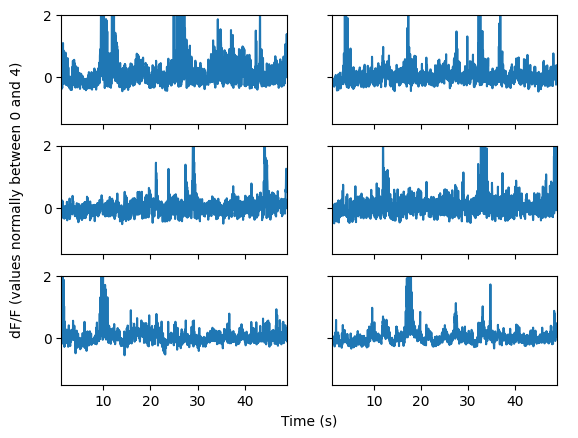

In [65]:
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices, 30)

## Changing Classifier

Pretrained model was saved in folder "c:\Users\sangeetha\Courses\CalciumImaging\Draft3\day1\Pretrained_models\Global_EXC_30Hz_smoothing25ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 25 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 7 neurons and 2000 frames.
Noise levels (mean, std; in standard units): 3.22, 0.82

Predictions for noise level 2:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Predictions for noise level 3:


	... ensemble 0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
	... ensemble 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
	... ensemble 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
	... ensemble 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
	... ensemble 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step



Predictions for noise level 4:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Predictions for noise level 5:
	No neurons for this noise level

Predictions for noise level 6:
	No neurons for this noise level

Predictions for noise level 7:
	No neurons for this noise level

Predictions for noise level 8:
	No neurons for this noise level

Predictions for noise level 9:
	No neurons for this noise level
Spike rate inference done.


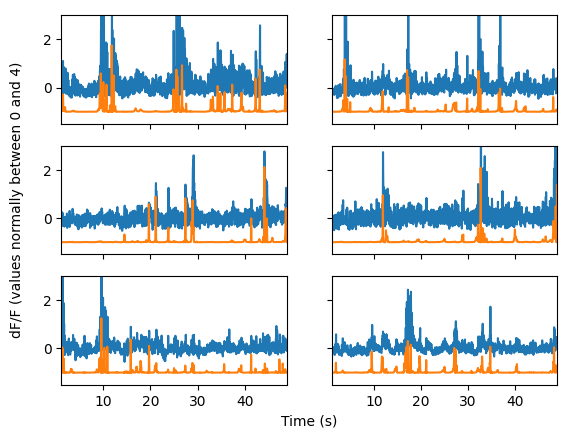

In [78]:
model_name = "Global_EXC_30Hz_smoothing25ms_causalkernel"
cascade.download_model(model_name,verbose = 1)
spike_prob = cascade.predict( model_name, traces)
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices,30,spike_prob,y_range=(-1.5, 3))

Pretrained model was saved in folder "c:\Users\sangeetha\Courses\CalciumImaging\Draft3\day1\Pretrained_models\Global_EXC_30Hz_smoothing100ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 100 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 7 neurons and 2000 frames.
Noise levels (mean, std; in standard units): 3.22, 0.82

Predictions for noise level 2:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step



Predictions for noise level 3:


	... ensemble 0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
	... ensemble 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
	... ensemble 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
	... ensemble 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
	... ensemble 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step



Predictions for noise level 4:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Predictions for noise level 5:
	No neurons for this noise level

Predictions for noise level 6:
	No neurons for this noise level

Predictions for noise level 7:
	No neurons for this noise level

Predictions for noise level 8:
	No neurons for this noise level
Spike rate inference done.


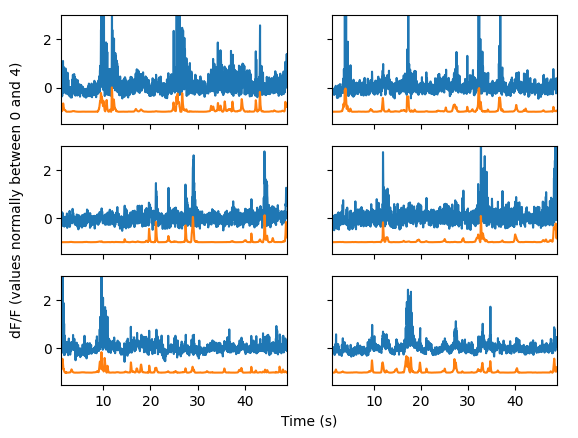

In [80]:
model_name = "Global_EXC_30Hz_smoothing100ms_causalkernel"
cascade.download_model(model_name,verbose = 1)
spike_prob = cascade.predict( model_name, traces)
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices,30,spike_prob,y_range=(-1.5, 3))

Pretrained model was saved in folder "c:\Users\sangeetha\Courses\CalciumImaging\Draft3\day1\Pretrained_models\Zebrafish_1Hz_smoothing1000ms"

 
The selected model was trained on 5 datasets, with 5 ensembles for each noise level, at a sampling rate of 1Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 1000 milliseconds. 
 

Loaded model was trained at frame rate 1 Hz
Given argument traces contains 7 neurons and 2000 frames.
Noise levels (mean, std; in standard units): 17.65, 4.51

Predictions for noise level 2:
	No neurons for this noise level

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level 4:
	No neurons for this noise level

Predictions for noise level 5:
	No neurons for this noise level

Predictions for noise level 6:
	No neurons for this noise level

Predictions for noise level 7:
	No neurons for this noise level

Predictions for noise level 8:
	No neurons for this noise level

Predicti

	... ensemble 0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
	... ensemble 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
	... ensemble 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
	... ensemble 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
	... ensemble 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step



Predictions for noise level 11:


	... ensemble 0
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
	... ensemble 1
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
	... ensemble 2
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
	... ensemble 3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
	... ensemble 4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Spike rate inference done.


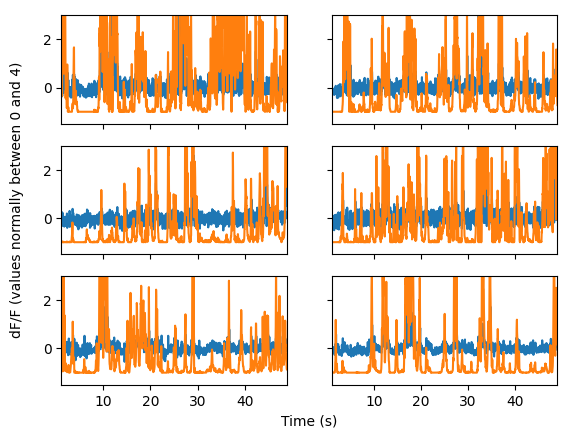

In [82]:
model_name = "Zebrafish_1Hz_smoothing1000ms"
cascade.download_model(model_name,verbose = 1)
spike_prob = cascade.predict( model_name, traces)
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices,30,spike_prob,y_range=(-1.5, 3))

## Comparing with OASIS

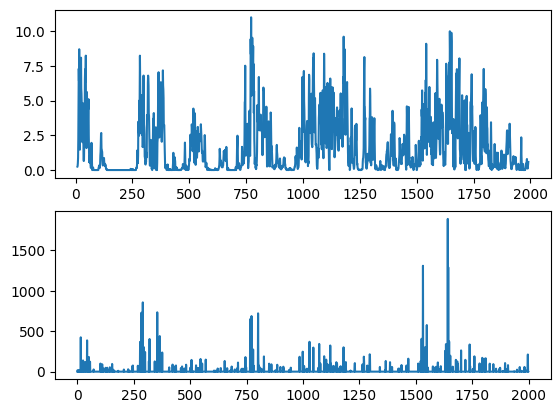

In [83]:
plt.subplot(211)
plt.plot(spike_prob[0])

plt.subplot(212)
plt.plot(deconv[0])

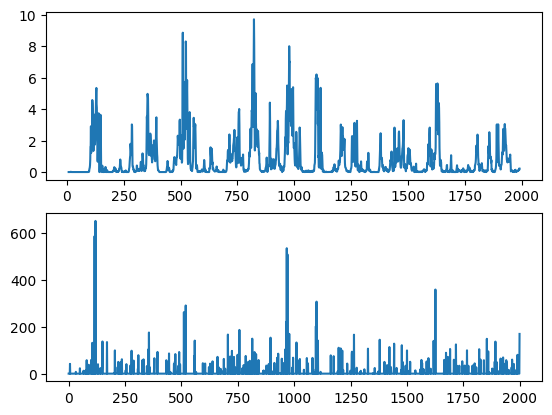

In [84]:
plt.subplot(211)
plt.plot(spike_prob[1])

plt.subplot(212)
plt.plot(deconv[1])

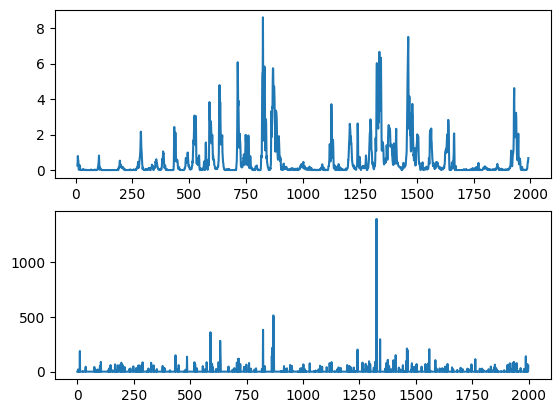

In [85]:
plt.subplot(211)
plt.plot(spike_prob[2])

plt.subplot(212)
plt.plot(deconv[2])